In [1]:
# importing libraries
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from scipy.stats import norm

# fetching data
import yfinance as yf

#for plotting the data 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab


In [70]:
stocks = ['BND', 'SPY', 'GLD', 'QQQ', 'VTI' ]
years = 15
endDate = dt.datetime.now()
startDate = endDate- dt.timedelta(days = 365*years)
adj_close_stock = yf.download(stocks, start=startDate, end=endDate)['Adj Close']

print(adj_close_stock)

[*********************100%***********************]  5 of 5 completed

Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2009-12-21  51.559330  106.949997   39.334240   84.792709   43.047592
2009-12-22  51.448616  106.169998   39.570469   85.097374   43.268147
2009-12-23  51.442120  106.550003   39.859177   85.264938   43.413643
2009-12-24  51.233696  108.360001   40.226620   85.668602   43.635746
2009-12-28  51.289227  108.550003   40.436596   85.851372   43.689331
...               ...         ...         ...         ...         ...
2024-12-09  73.489998  245.360001  522.380005  604.679993  300.519989
2024-12-10  73.410004  248.589996  520.599976  602.799988  299.390015
2024-12-11  73.250000  250.960007  529.919983  607.460022  301.799988
2024-12-12  72.959999  247.279999  526.500000  604.330017  300.079987
2024-12-13  72.669998  244.289993  530.530029  604.210022  299.929993

[3771 rows x 5 columns]


In [71]:
#calculating Daily Log Returns and droppingNAs
log_returns = np.log(adj_close_stock/adj_close_stock.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2009-12-22 -0.002150 -0.007320  0.005988  0.003587  0.005110
2009-12-23 -0.000126  0.003573  0.007270  0.001967  0.003357
2009-12-24 -0.004060  0.016845  0.009176  0.004723  0.005103
2009-12-28  0.001083  0.001752  0.005206  0.002131  0.001227
2009-12-29  0.000637 -0.009999 -0.004119 -0.001420 -0.001754
...              ...       ...       ...       ...       ...
2024-12-09 -0.002989  0.009871 -0.007818 -0.005163 -0.006402
2024-12-10 -0.001089  0.013078 -0.003413 -0.003114 -0.003767
2024-12-11 -0.002182  0.009489  0.017744  0.007701  0.008017
2024-12-12 -0.003967 -0.014772 -0.006475 -0.005166 -0.005715
2024-12-13 -0.003983 -0.012165  0.007625 -0.000199 -0.000500

[3770 rows x 5 columns]


In [72]:
# Creating an Equally Weighted Portfolio
portfolio_value = 1000000
weights = np.array([1/len(stocks)]*len(stocks))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [80]:
#finding 5 days historical return
days = 5

historical_return = (log_returns*weights).sum(axis =1)
historical_days_return = historical_return.rolling(window = days).sum()
historical_days_return_dollar = historical_days_return*portfolio_value

In [81]:
#creating covariance matrixand calculating Portfolio Standard Deviation

cov_matrix = log_returns.cov()*252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [82]:
# Calculating VaR at 90%, 95%, 99%


confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * (historical_return.mean()-norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252)  * days)
    VaRs.append(VaR)

In [83]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-'*40)

for cl, VaR in zip(confidence_levels,VaRs):
    print(f'{cl*100:>6.0f}%: {"":<8} ${VaR :>10,.2f}')
      

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $104,686.15
    95%:          $134,247.78
    99%:          $189,700.48


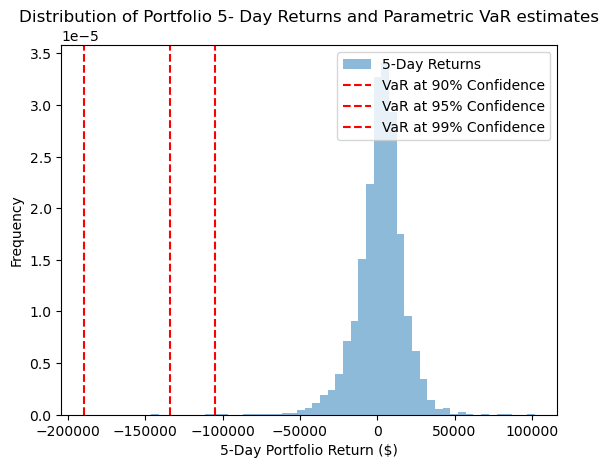

In [84]:
#plotting histogram
plt.hist(historical_days_return_dollar, bins = 50, density = True, alpha = 0.5, label = f'{days}-Day Returns')

#Adding vertical lines representing VaR at each confidence Level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x =-VaR, linestyle = '--', color = 'r', label = 'VaR at {}% Confidence'.format(int(cl*100)))
    
plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}- Day Returns and Parametric VaR estimates')
plt.legend()
plt.show()